<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/10_combined_model_v2_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-16 21:29:45--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11745 (11K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]  11.47K  --.-KB/s    in 0s      

2022-06-16 21:29:45 (105 MB/s) - ‘utils.py.1’ saved [11745/11745]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import os

import tensorflow as tf
from tensorflow import keras

from utils import get_train_val_ds, ErrorAnalyzer, get_class_weight, get_model

     |████████████████████████████████| 25.9 MB 24.7 MB/s 


In [4]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [6]:
_, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 16580 files belonging to 16 classes.
Found 3510 files belonging to 16 classes.


In [10]:
classes, _ = get_class_weight()

In [7]:
file_paths = val_ds.file_paths

In [9]:
rgb_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

## Epoch 10

In [8]:
combined_10 = get_model('combined-model-10.2.h5')

In [12]:
analyzer_10 = ErrorAnalyzer(model=combined_10,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-10.2')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


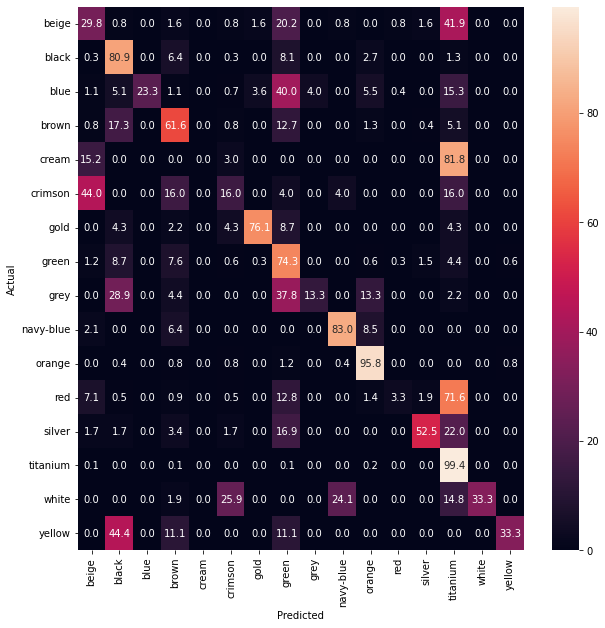

Calculateing error types...
Writing in log file...
All done. Check log file => combined-10.2.csv
Accuracy: %73.25
Precision mean: nan
Recall mean: 0.4849


/content/utils.py:159: RuntimeWarning: invalid value encountered in true_divide
  precision = self.conf_mat[class_num, class_num] / self.conf_mat.sum(axis=0)[class_num]


In [13]:
analyzer_10.plot_confusion_mat()
analyzer_10.evaluate_model()

## Epoch 15

In [14]:
combined_15 = get_model('combined-model-15.2.h5')

In [15]:
analyzer_15 = ErrorAnalyzer(model=combined_15,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-15.2')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


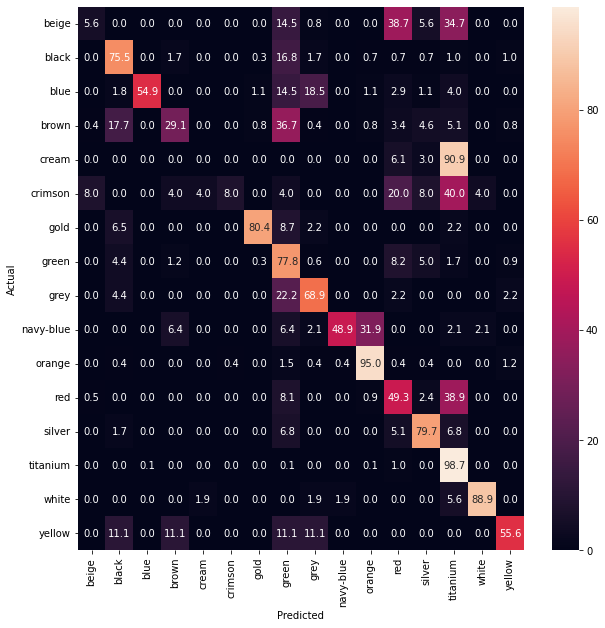

Calculateing error types...
Writing in log file...
All done. Check log file => combined-15.2.csv
Accuracy: %76.58
Precision mean: 0.6554
Recall mean: 0.5727


In [18]:
analyzer_15.plot_confusion_mat()
analyzer_15.evaluate_model()

## Epoch 20

In [19]:
combined_20 = get_model('combined-model-20.2.h5')

In [20]:
analyzer_20 = ErrorAnalyzer(model=combined_20,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-20.2')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


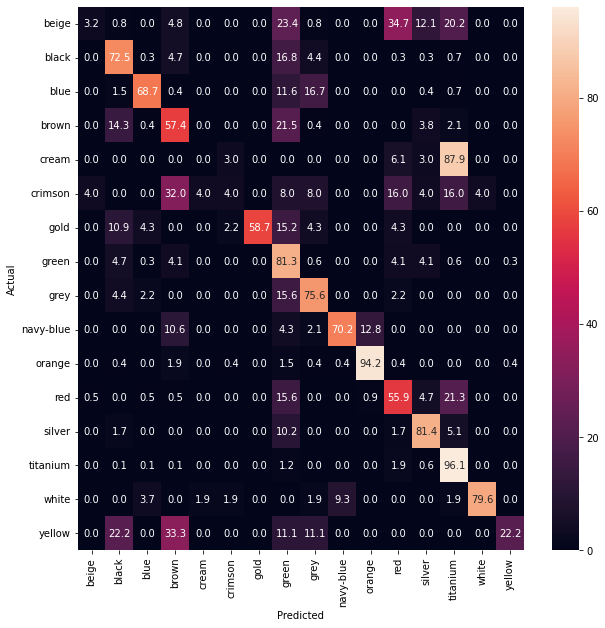

Calculateing error types...
Writing in log file...
All done. Check log file => combined-20.2.csv
Accuracy: %78.69
Precision mean: 0.6465
Recall mean: 0.5756


In [21]:
analyzer_20.plot_confusion_mat()
analyzer_20.evaluate_model()

## Epoch 24

In [22]:
combined_24 = get_model('combined-model-24.2.h5')

In [23]:
analyzer_24 = ErrorAnalyzer(model=combined_24,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-24.2')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


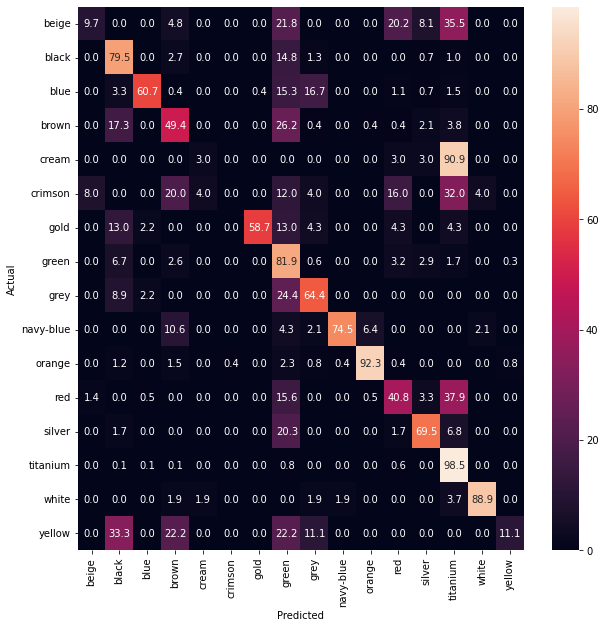

Calculateing error types...
Writing in log file...
All done. Check log file => combined-24.2.csv
Accuracy: %78.18
Precision mean: 0.6514
Recall mean: 0.5518


In [24]:
analyzer_24.plot_confusion_mat()
analyzer_24.evaluate_model()

## Epoch 29

In [25]:
combined_29 = get_model('combined-model-29.2.h5')

In [37]:
analyzer_29 = ErrorAnalyzer(model=combined_29,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-29.2')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


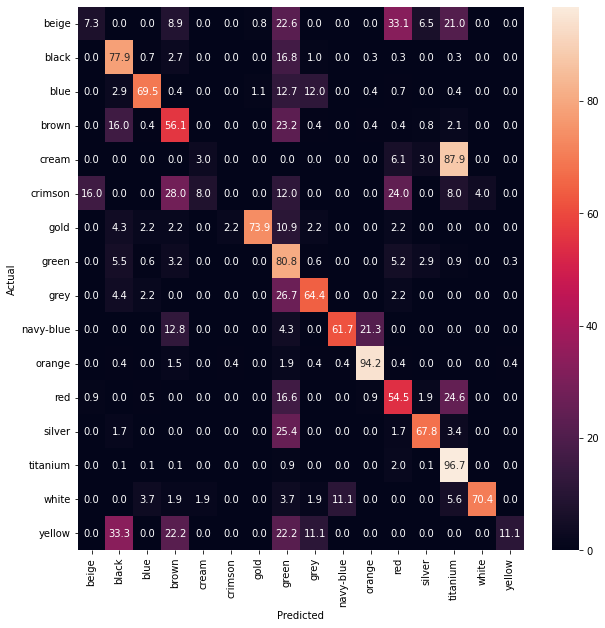

Calculateing error types...
Writing in log file...
All done. Check log file => combined-29.2.csv
Accuracy: %78.95
Precision mean: 0.6359
Recall mean: 0.5558


In [38]:
analyzer_29.plot_confusion_mat()
analyzer_29.evaluate_model()

In [29]:
!zip -r logs-combined-v2.zip ./logs

updating: logs/ (stored 0%)
  adding: logs/statistic/ (stored 0%)
  adding: logs/statistic/combined-24.2.csv (deflated 47%)
  adding: logs/statistic/combined-29.2.csv (deflated 46%)
  adding: logs/statistic/combined-10.2.csv (deflated 72%)
  adding: logs/statistic/images/ (stored 0%)
  adding: logs/statistic/images/combined-20.2.jpg (deflated 16%)
  adding: logs/statistic/images/combined-24.2.jpg (deflated 16%)
  adding: logs/statistic/images/combined-10.2.jpg (deflated 15%)
  adding: logs/statistic/images/combined-29.2.jpg (deflated 16%)
  adding: logs/statistic/images/combined-15.2.jpg (deflated 16%)
  adding: logs/statistic/combined-15.2.csv (deflated 46%)
  adding: logs/statistic/combined-10.2-conf-mat.npy (deflated 74%)
  adding: logs/statistic/combined-20.2-conf-mat.npy (deflated 75%)
  adding: logs/statistic/combined-15.2-conf-mat.npy (deflated 75%)
  adding: logs/statistic/combined-24.2-conf-mat.npy (deflated 75%)
  adding: logs/statistic/combined-20.2.csv (deflated 46%)
  addi

# Analyze Best Model

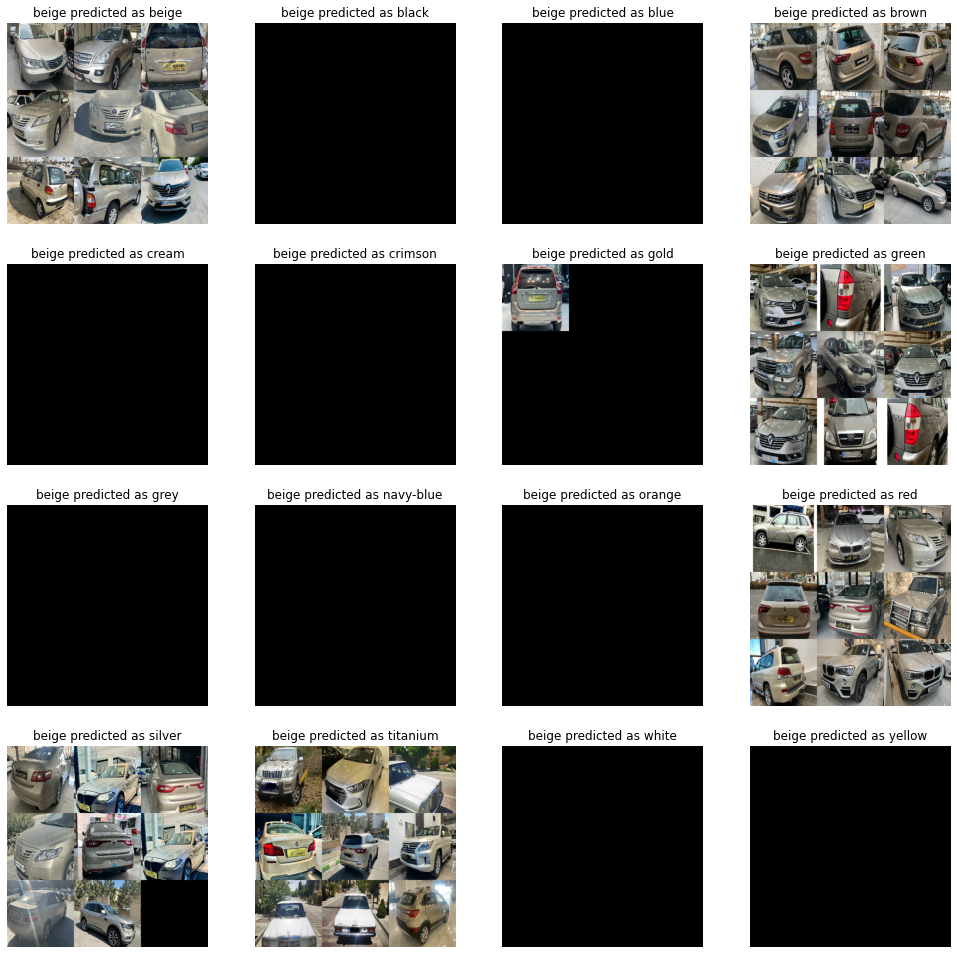

In [41]:
analyzer_29.plot_missclassified('beige')

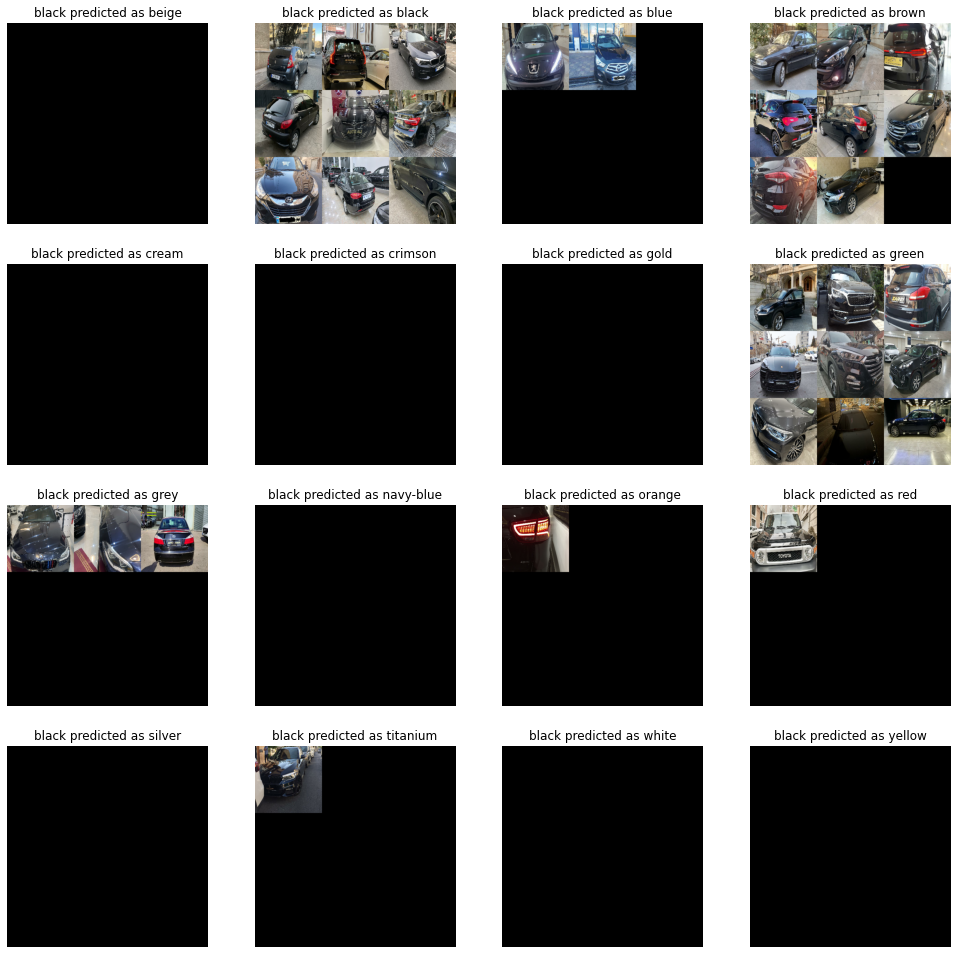

In [42]:
analyzer_29.plot_missclassified('black')

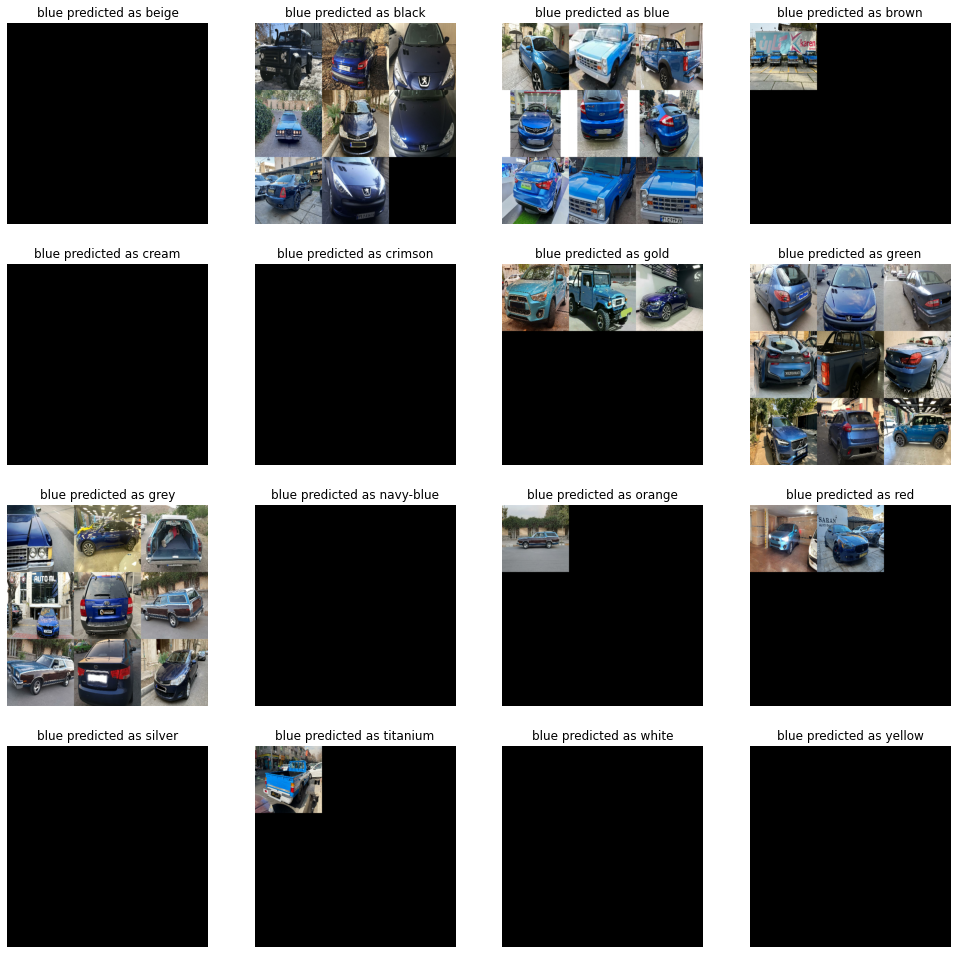

In [43]:
analyzer_29.plot_missclassified('blue')

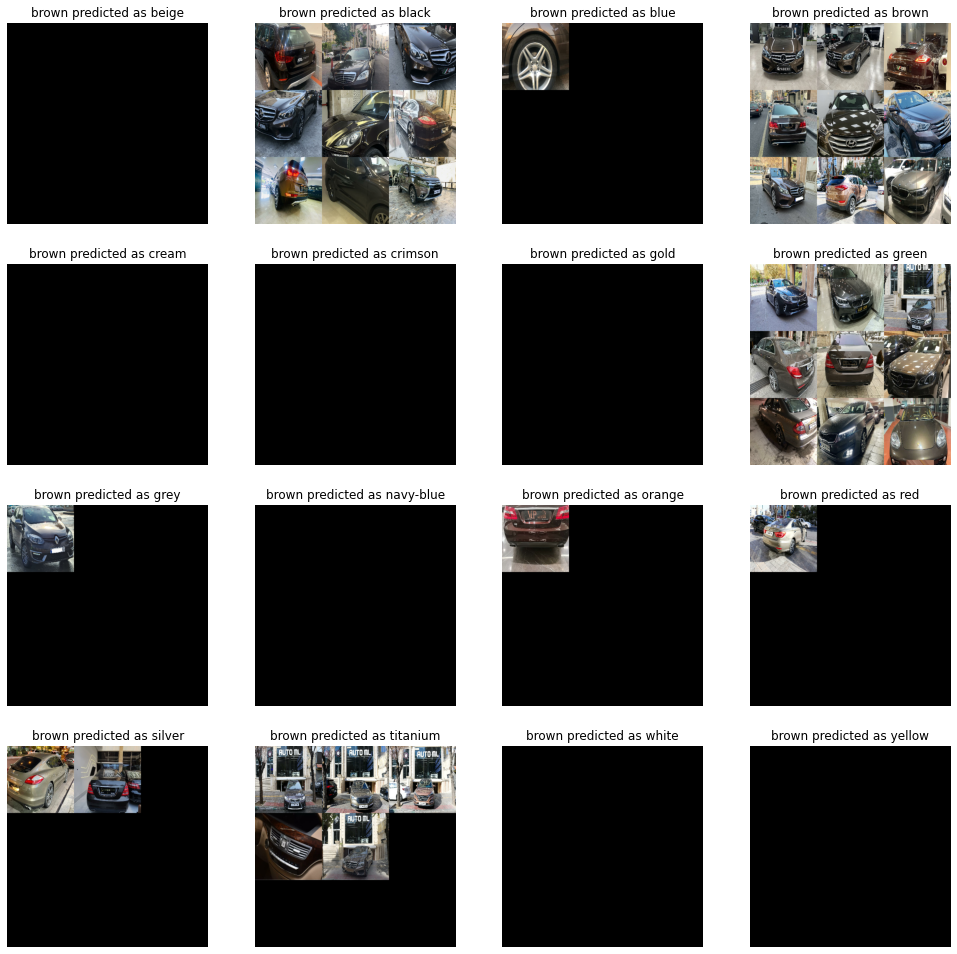

In [44]:
analyzer_29.plot_missclassified('brown')

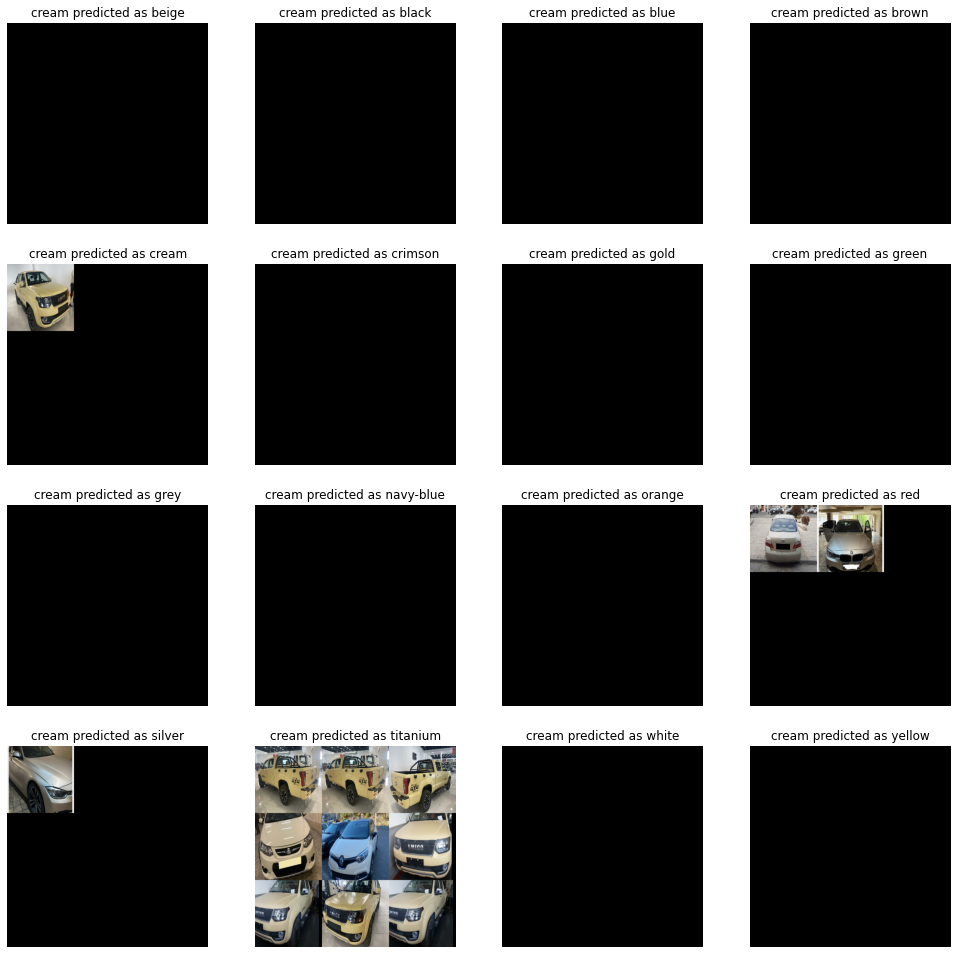

In [45]:
analyzer_29.plot_missclassified('cream')

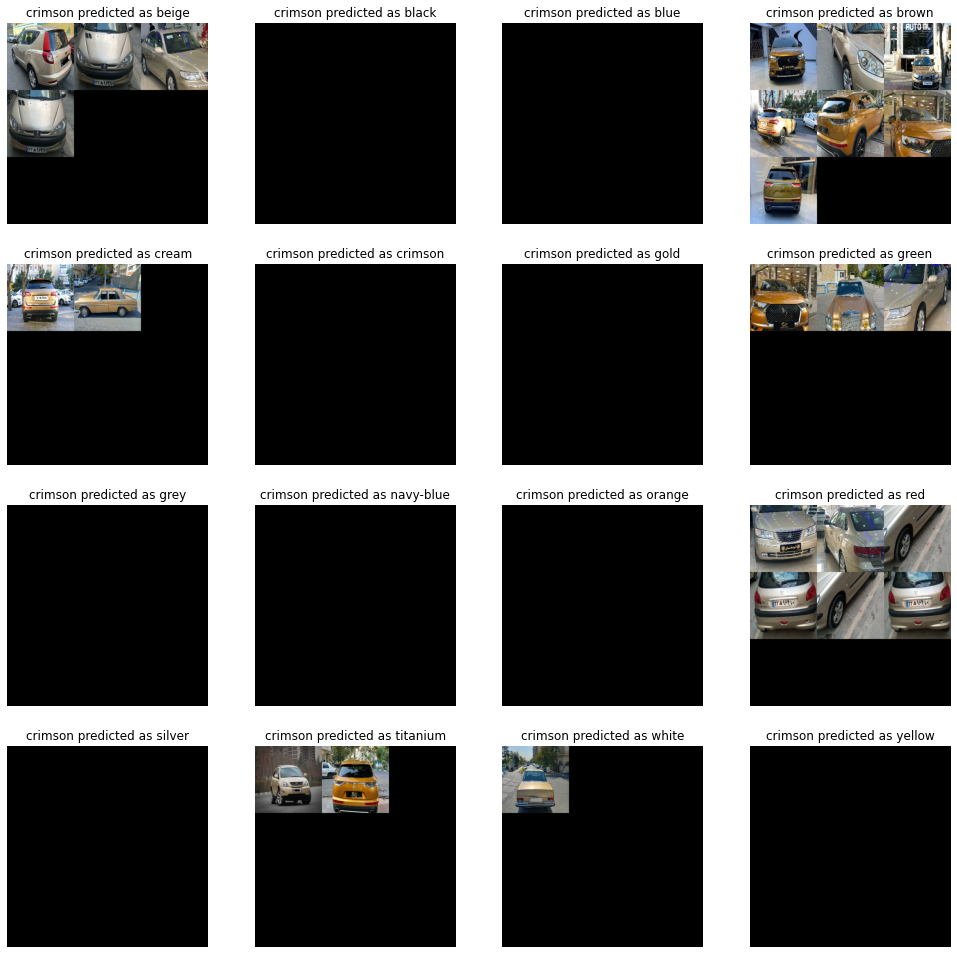

In [46]:
analyzer_29.plot_missclassified('crimson')

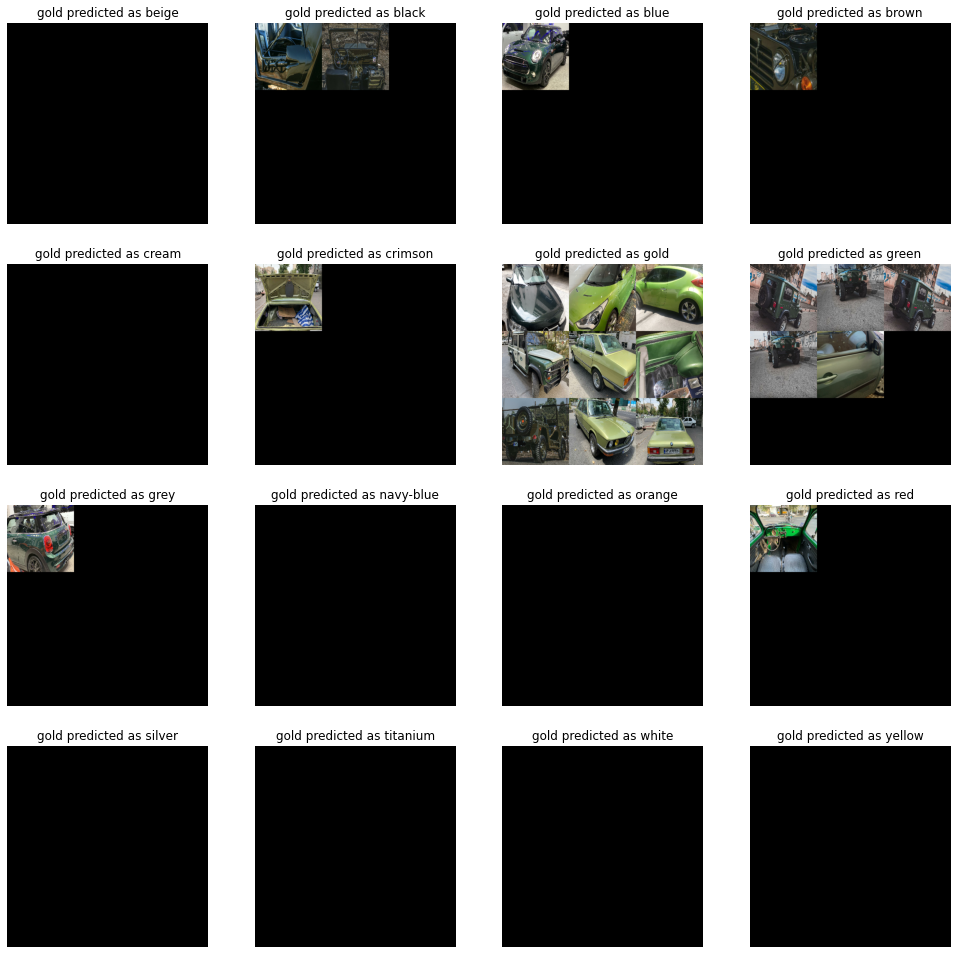

In [47]:
analyzer_29.plot_missclassified('gold')

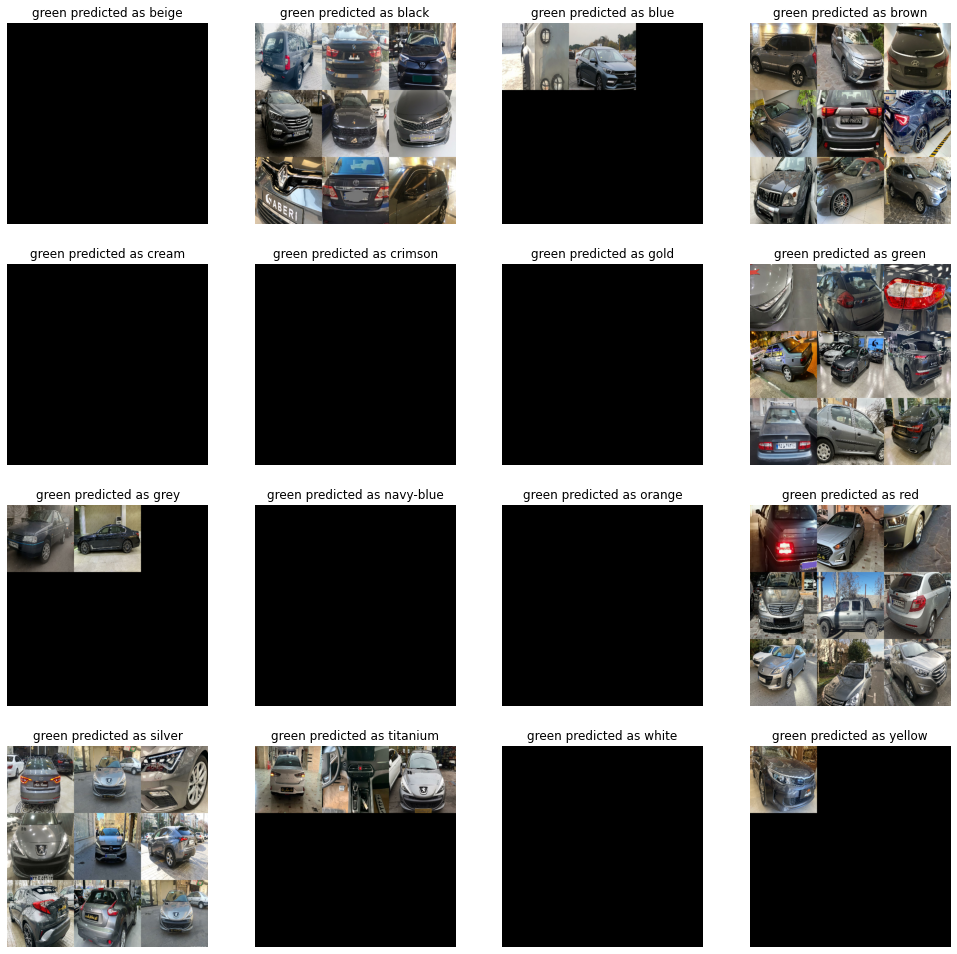

In [48]:
analyzer_29.plot_missclassified('green')

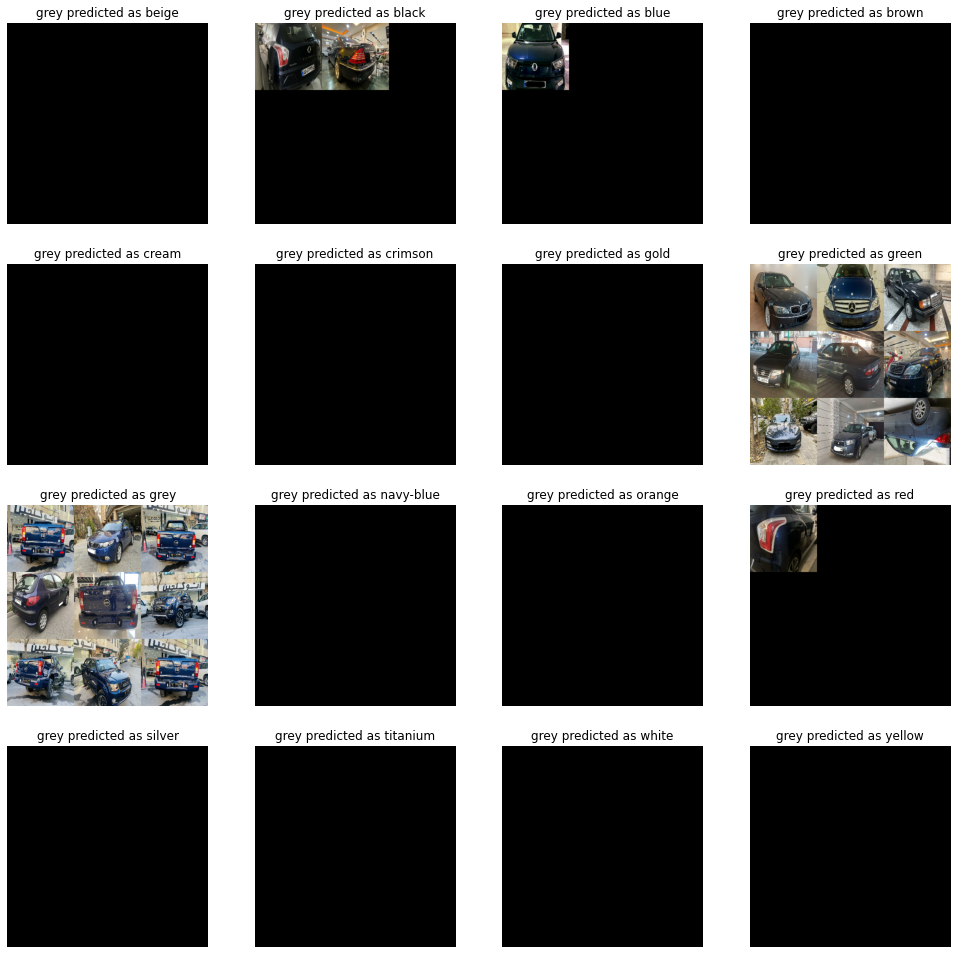

In [50]:
analyzer_29.plot_missclassified('grey')

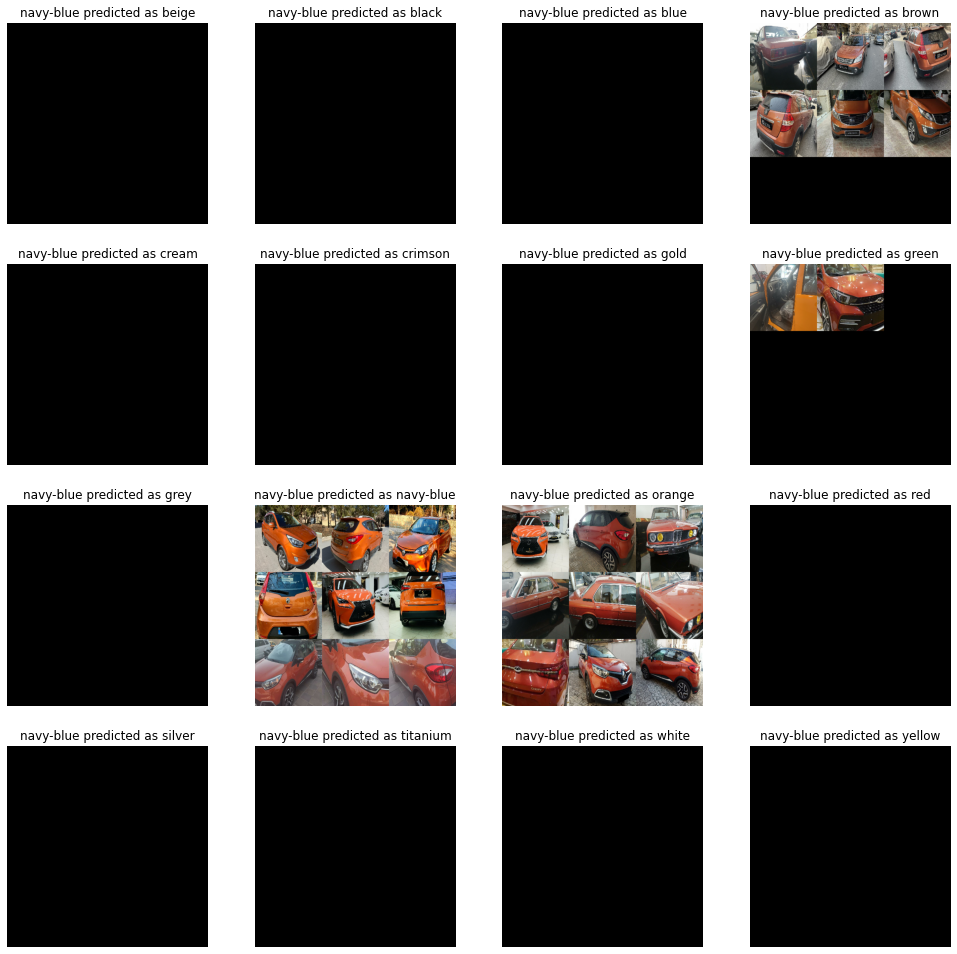

In [51]:
analyzer_29.plot_missclassified('navy-blue')

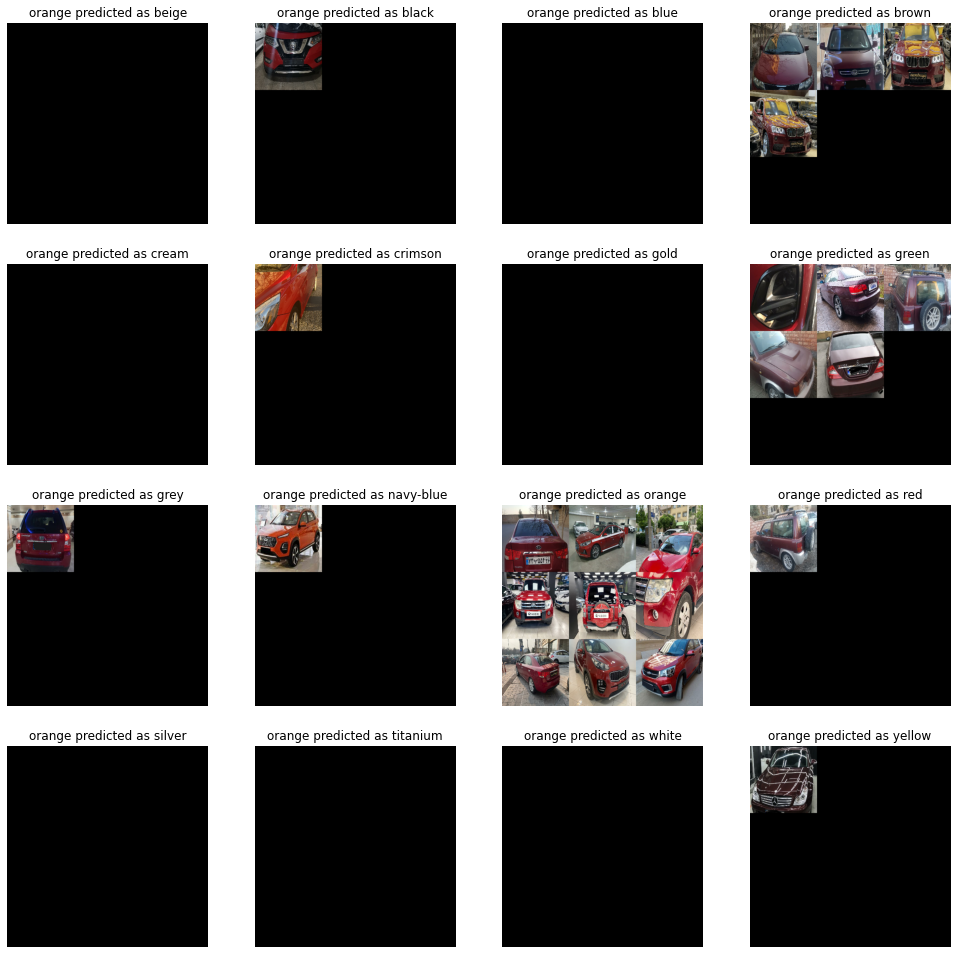

In [52]:
analyzer_29.plot_missclassified('orange')

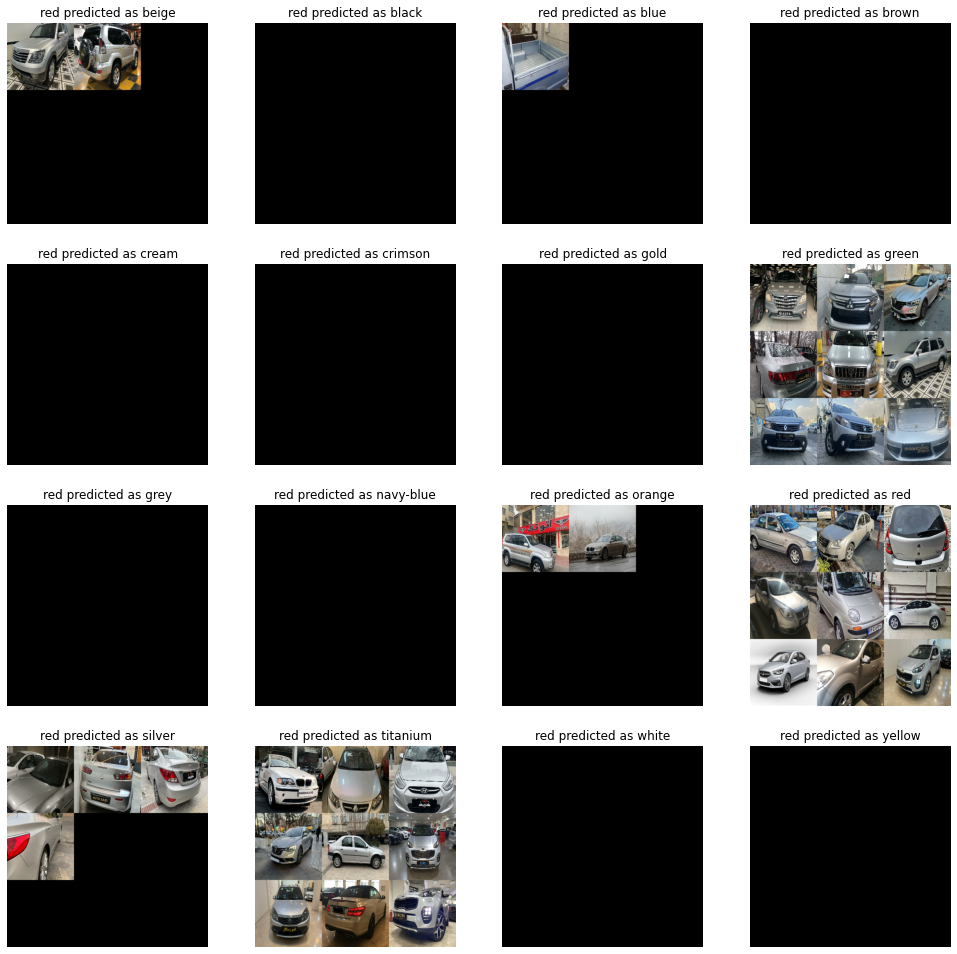

In [53]:
analyzer_29.plot_missclassified('red')

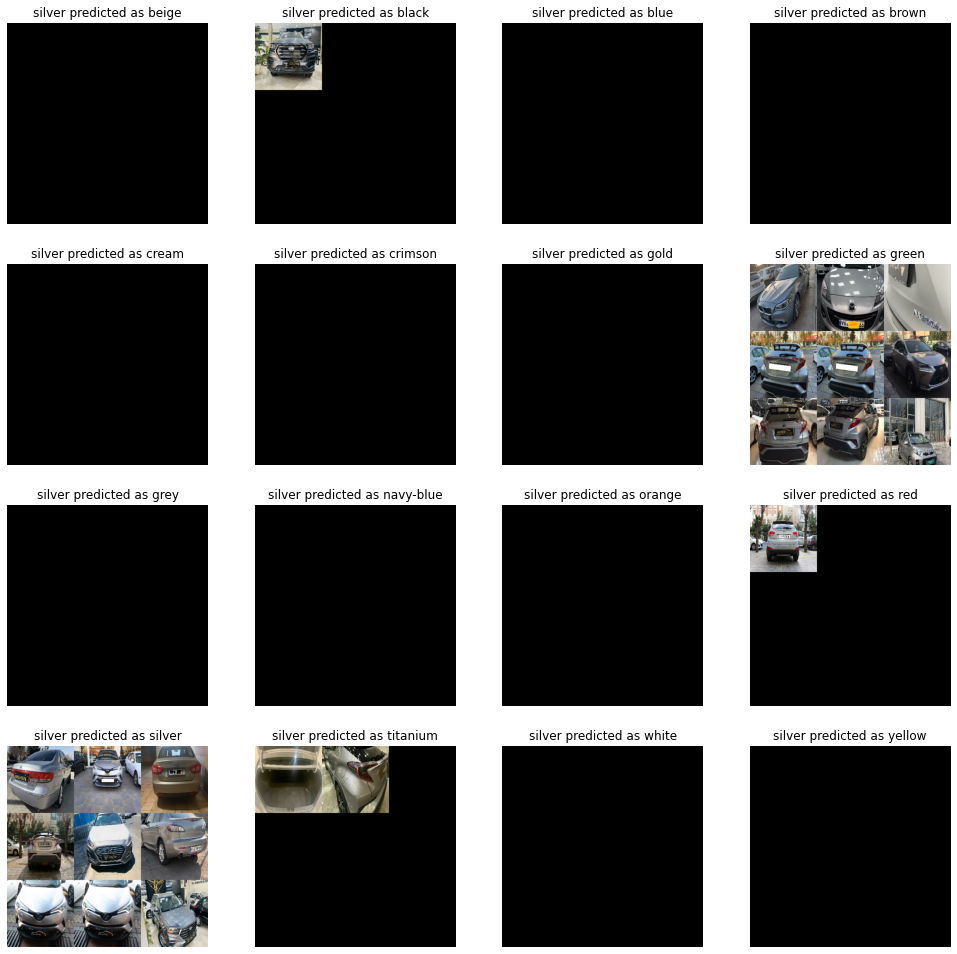

In [55]:
analyzer_29.plot_missclassified('silver')

In [ ]:
analyzer_29.plot_missclassified('titanium')

In [ ]:
analyzer_29.plot_missclassified('white')

In [ ]:
analyzer_29.plot_missclassified('yellow')